In [1]:
pip install catboost

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

**LOADING THE DATASETS**

In [3]:
data = pd.read_csv('/content/CAC40_stocks_2010_2021.csv')
data

,CompanyName,StockName,High,Low,Open,Close,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400.0,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600.0,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200.0,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000.0,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400.0,2010-01-08
...,...,...,...,...,...,...,...,...
81730,LVMH,MC,53.889999,51.279999,53.689999,51.450001,404700.0,2021-01-26
81731,LVMH,MC,50.779999,48.759998,50.419998,49.369999,688200.0,2021-01-27
81732,LVMH,MC,51.820000,49.639999,49.930000,51.189999,480400.0,2021-01-28
81733,LVMH,MC,51.130001,48.990002,51.099998,49.709999,341000.0,2021-01-29


**SAVING A COPY OF THE DATASET**

In [4]:
data_copy = data.copy()

**EDA**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

first lets split the Date column

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [7]:
data

,CompanyName,StockName,High,Low,Open,Close,Volume,Date,Year,Month,Day
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400.0,2010-01-04,2010,1,4
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600.0,2010-01-05,2010,1,5
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200.0,2010-01-06,2010,1,6
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000.0,2010-01-07,2010,1,7
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400.0,2010-01-08,2010,1,8
...,...,...,...,...,...,...,...,...,...,...,...
81730,LVMH,MC,53.889999,51.279999,53.689999,51.450001,404700.0,2021-01-26,2021,1,26
81731,LVMH,MC,50.779999,48.759998,50.419998,49.369999,688200.0,2021-01-27,2021,1,27
81732,LVMH,MC,51.820000,49.639999,49.930000,51.189999,480400.0,2021-01-28,2021,1,28
81733,LVMH,MC,51.130001,48.990002,51.099998,49.709999,341000.0,2021-01-29,2021,1,29


In [8]:
years = data['Year'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

Close value plot of all years

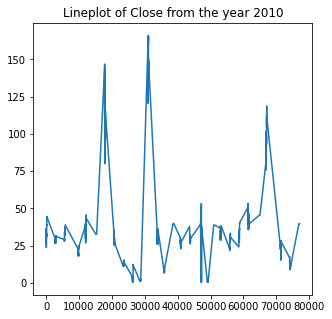

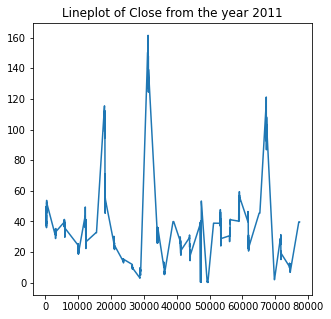

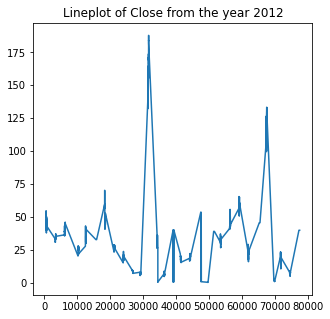

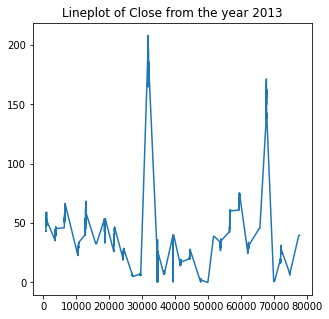

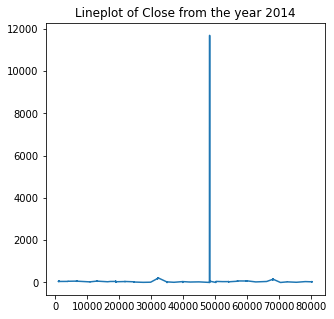

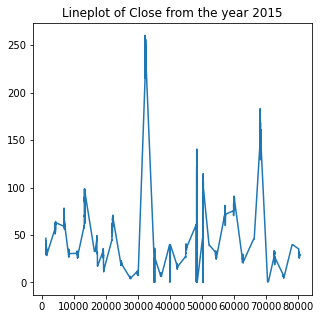

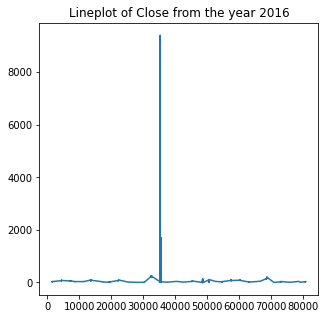

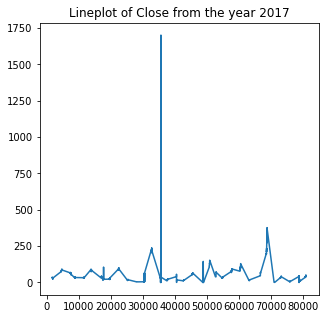

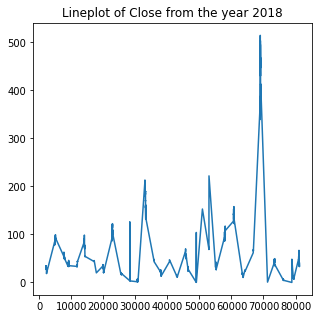

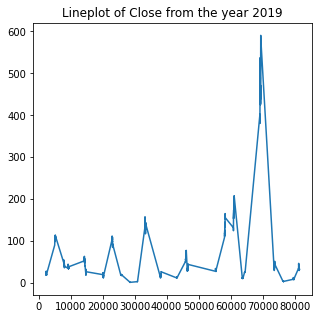

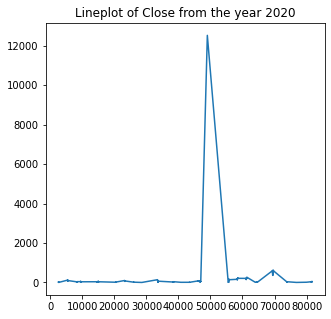

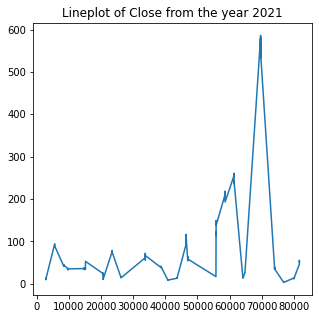

In [9]:
for year in years:
  to_plot = data[data['Year']==year].Close
  plt.figure(figsize=(5,5))
  plt.title(f'Lineplot of Close from the year {year}')
  plt.plot(to_plot)
  plt.show()

In [10]:
cols = ['High', 'Low', 'Open', 'Close', 'Volume']

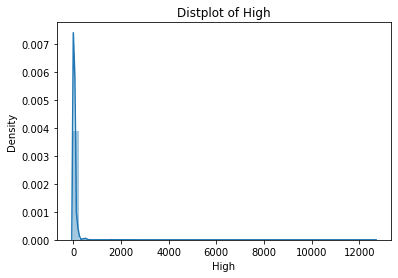

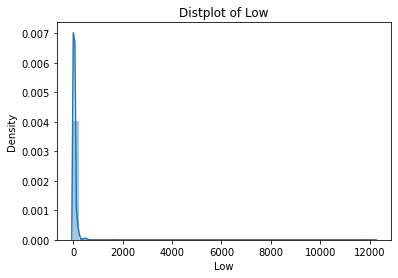

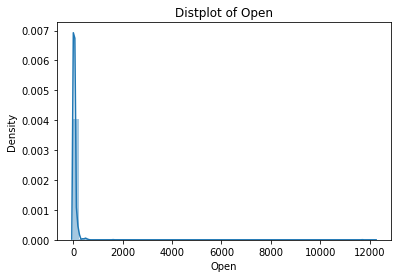

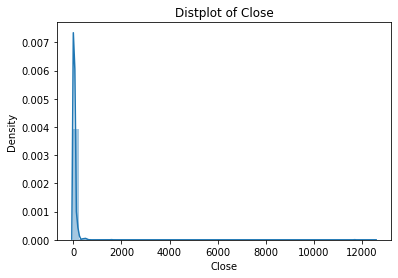

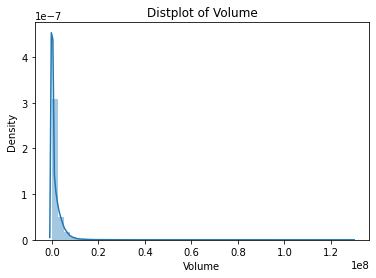

In [11]:
for col in cols:
  plt.title(f'Distplot of {col}')
  sns.distplot(data[col])
  plt.show()

**DATA PROCESSING**

null values

In [12]:
data.isnull().sum().any()

False

dropping useless columns

In [13]:
data.drop(['Date', 'Year', 'Month', 'Day'], axis=1, inplace=True)

feature creation

In [14]:
data['Difference'] = data['High'] - data['Low']

scaling numeric data

In [15]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [16]:
cols_to_scale = ['High', 'Low', 'Open', 'Close', 'Volume', 'Difference']

In [17]:
robust = RobustScaler()
standard = StandardScaler()

data[cols_to_scale] = robust.fit_transform(data[cols_to_scale])
data[cols_to_scale] = standard.fit_transform(data[cols_to_scale])

Encoding categorical data to numeric data

In [18]:
cat_cols = ['CompanyName', 'StockName']

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
  data[col] = le.fit_transform(data[col])

In [20]:
data

,CompanyName,StockName,High,Low,Open,Close,Volume,Difference
0,33,16,-0.111459,-0.111279,-0.113421,-0.110627,0.149294,-0.048685
1,33,16,-0.109433,-0.108925,-0.110801,-0.108133,0.259533,-0.070317
2,33,16,-0.109263,-0.109514,-0.108694,-0.107448,0.450881,-0.018732
3,33,16,-0.109677,-0.108140,-0.108131,-0.109160,0.397942,-0.140206
4,33,16,-0.108311,-0.108582,-0.109723,-0.106543,0.656498,-0.017069
...,...,...,...,...,...,...,...,...
81730,18,21,0.005860,-0.002370,0.007149,-0.003830,-0.406598,0.560344
81731,18,21,-0.009320,-0.014730,-0.008869,-0.014004,-0.301793,0.363990
81732,18,21,-0.004244,-0.010413,-0.011269,-0.005102,-0.378613,0.417239
81733,18,21,-0.007612,-0.013602,-0.005538,-0.012341,-0.430147,0.403926


feature correlation

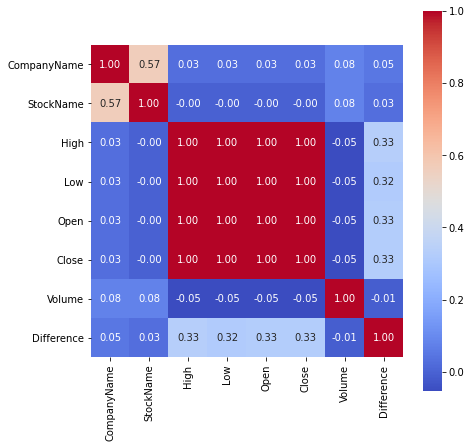

In [21]:
corr = data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True, fmt='.2f')
plt.show()

**SPLITTING DATA INTO TRAINING AND TESTING SETS**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X, y = data.drop('Close', axis=1), data['Close']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

**SPLITTING TRAINING DATA INTO TRAINING AND VALIDATION SETS**

In [25]:
x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=56)

**MODEL SELECTION**

In [26]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, RidgeCV

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
def model_selection(x_train_, x_val, y_train_, y_val, model):
  model = model()
  model.fit(x_train_, y_train_)

  pred = model.predict(x_val)

  error = np.sqrt(mean_squared_error(y_val, pred))
  r2 = r2_score(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)

  print('Error:', error*100)
  print('\n')
  print('R2 Score:', r2*100)
  print('\n')
  print('Train Score:', train_score*100)
  print('\n')
  print('Val Score:', val_score*100)
  print('\n')
  print('Is Overfitting:', True if train_score>val_score else False)
  print('\n')
  print('Overfitting by:', train_score - val_score)

In [29]:
extratrees = model_selection(x_train_, x_val, y_train_, y_val, ExtraTreesRegressor)
extratrees

Error: 0.5205867706399082


R2 Score: 99.99552675087384


Train Score: 99.99999907732347


Val Score: 99.99552675087384


Is Overfitting: True


Overfitting by: 4.472326449633801e-05


In [30]:
gradient = model_selection(x_train_, x_val, y_train_, y_val, GradientBoostingRegressor)
gradient

Error: 0.7712147967187915


R2 Score: 99.99018280228138


Train Score: 99.99617641657066


Val Score: 99.99018280228138


Is Overfitting: True


Overfitting by: 5.9936142892791366e-05


In [31]:
random = model_selection(x_train_, x_val, y_train_, y_val, RandomForestRegressor)
random

Error: 0.496130379401245


R2 Score: 99.9959371716653


Train Score: 99.99958153650103


Val Score: 99.9959371716653


Is Overfitting: True


Overfitting by: 3.644364835719838e-05


In [32]:
linear = model_selection(x_train_, x_val, y_train_, y_val, LinearRegression)
linear

Error: 0.417068023245548


R2 Score: 99.99712888480194


Train Score: 99.99764414529265


Val Score: 99.99712888480194


Is Overfitting: True


Overfitting by: 5.152604907077141e-06


In [33]:
lasso = model_selection(x_train_, x_val, y_train_, y_val, Lasso)
lasso

Error: 72.481628813682


R2 Score: 13.285301298089557


Train Score: 13.318533474145688


Val Score: 13.285301298089557


Is Overfitting: True


Overfitting by: 0.0003323217605613049


In [34]:
net = model_selection(x_train_, x_val, y_train_, y_val, ElasticNet)
net

Error: 41.8406669385858


R2 Score: 71.10424622414493


Train Score: 71.09374293720265


Val Score: 71.10424622414493


Is Overfitting: False


Overfitting by: -0.00010503286942276091


In [35]:
ridge = model_selection(x_train_, x_val, y_train_, y_val, RidgeCV)
ridge

Error: 0.40680215028847494


R2 Score: 99.99726848675581


Train Score: 99.99762651292235


Val Score: 99.99726848675581


Is Overfitting: True


Overfitting by: 3.5802616653590746e-06


In [36]:
xgb = model_selection(x_train_, x_val, y_train_, y_val, XGBRegressor)
xgb

[13:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Error: 0.776819363096076


R2 Score: 99.99003959688366


Train Score: 99.99586450038213


Val Score: 99.99003959688366


Is Overfitting: True


Overfitting by: 5.8249034984636516e-05


In [37]:
lgbm = model_selection(x_train_, x_val, y_train_, y_val, LGBMRegressor)
lgbm

Error: 21.040223097177922


R2 Score: 92.69302684413633


Train Score: 94.16643643135227


Val Score: 92.69302684413633


Is Overfitting: True


Overfitting by: 0.014734095872159347


In [38]:
catboost = model_selection(x_train_, x_val, y_train_, y_val, CatBoostRegressor)
catboost

Learning rate set to 0.078942
0:	learn: 0.9667997	total: 58.1ms	remaining: 58s
1:	learn: 0.9030577	total: 68.3ms	remaining: 34.1s
2:	learn: 0.8435133	total: 78.7ms	remaining: 26.2s
3:	learn: 0.7878524	total: 88.7ms	remaining: 22.1s
4:	learn: 0.7359296	total: 98.1ms	remaining: 19.5s
5:	learn: 0.6873114	total: 108ms	remaining: 17.9s
6:	learn: 0.6416103	total: 117ms	remaining: 16.6s
7:	learn: 0.5992080	total: 130ms	remaining: 16.1s
8:	learn: 0.5598346	total: 140ms	remaining: 15.4s
9:	learn: 0.5237338	total: 150ms	remaining: 14.8s
10:	learn: 0.4891348	total: 159ms	remaining: 14.3s
11:	learn: 0.4573595	total: 168ms	remaining: 13.8s
12:	learn: 0.4273250	total: 177ms	remaining: 13.5s
13:	learn: 0.3996705	total: 199ms	remaining: 14s
14:	learn: 0.3735230	total: 209ms	remaining: 13.7s
15:	learn: 0.3491832	total: 219ms	remaining: 13.4s
16:	learn: 0.3264648	total: 228ms	remaining: 13.2s
17:	learn: 0.3052103	total: 237ms	remaining: 12.9s
18:	learn: 0.2851622	total: 246ms	remaining: 12.7s
19:	learn:

I will use RandomForestRegressor

**MODEL BUILDING**

In [39]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**PREDICTIONS**

In [40]:
pred = model.predict(x_test)
pred

array([-0.15939051, -0.11890698, -0.21914055, ..., -0.14908948,
       -0.2219343 ,  0.00152132])

**METRICS**

R2 Score

In [43]:
R2 = r2_score(y_test, pred)
R2*100

99.19001475924892

Mean Squared Error

In [47]:
error = mean_squared_error(y_test, pred)
error*100

0.8767078205283244

**PREDICTING WITH RANDOM COLS**

In [49]:
data

,CompanyName,StockName,High,Low,Open,Close,Volume,Difference
0,33,16,-0.111459,-0.111279,-0.113421,-0.110627,0.149294,-0.048685
1,33,16,-0.109433,-0.108925,-0.110801,-0.108133,0.259533,-0.070317
2,33,16,-0.109263,-0.109514,-0.108694,-0.107448,0.450881,-0.018732
3,33,16,-0.109677,-0.108140,-0.108131,-0.109160,0.397942,-0.140206
4,33,16,-0.108311,-0.108582,-0.109723,-0.106543,0.656498,-0.017069
...,...,...,...,...,...,...,...,...
81730,18,21,0.005860,-0.002370,0.007149,-0.003830,-0.406598,0.560344
81731,18,21,-0.009320,-0.014730,-0.008869,-0.014004,-0.301793,0.363990
81732,18,21,-0.004244,-0.010413,-0.011269,-0.005102,-0.378613,0.417239
81733,18,21,-0.007612,-0.013602,-0.005538,-0.012341,-0.430147,0.403926


In [50]:
model.predict([[33, 16, -0.111459, -0.111279, -0.113421, 0.149294, -0.048685]]) #1st col of the data

array([-0.1106143])

In [56]:
model.predict([[18, 21, -0.009320, -0.014730, -0.008869, -0.301793, 0.363990]]) #81731 col of the data

array([-0.01400886])